#Cleaning Our Datasets

### importing requried modules

In [25]:
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Dataset 1 - road_traffic_counts_station_reference

In [26]:
df1_path = 'https://drive.google.com/uc?id=1BOTNBWJCSc1RxbRJmC_w0vhkMZVECMaL'
df1 = pd.read_csv(df1_path)
df1.head() #shows the head of dataset before any changes.

,the_geom,cartodb_id,the_geom_webmercator,record_id,station_key,station_id,name,road_name,full_name,common_road_name,...,vehicle_classifier,lambert_easting,lambert_northing,wgs84_latitude,wgs84_longitude,direction_seq,quality_rating,publish,md5,updated_on
0,NaN,5557,NaN,NaN,15828002,7211,Lily Lane,Lily Lane,"Lily Lane, South of Fern Circuit",Lily Lane,...,1,9740191,4524353.5,-32.940571,151.713120,7,5,True,be6e76534a9cbe57941a6971d910a6eb,2018-06-12 02:48:41.978017+00
1,NaN,5558,NaN,NaN,58612,97340,Oxley Avenue,Oxley Avenue,"Oxley Avenue, North of High Street",Oxley Avenue,...,0,9163953,4473475.5,-33.480766,145.534805,9,5,True,417b961c9a41b3a2f7ce41fa423d8977,2018-06-12 02:48:41.978017+00
2,NaN,5559,NaN,NaN,56692,19035,Sydenham Road,Sydenham Road,"Sydenham Road, West of Victoria Road",Sydenham Road,...,0,9684475,4419245.0,-33.909630,151.162048,10,5,True,710efc78db32af23f3a6ed4870bc7aeb,2018-06-12 02:48:41.978017+00
3,NaN,5560,NaN,NaN,58856,99931,Castlereagh Highway,Castlereagh Highway,"Castlereagh Highway, South of Abattoirs Road",Castlereagh Highway,...,1,9539223,4573615.5,-32.559254,149.549698,9,5,True,4dbb7f7bd091635de8b3a10399455245,2018-06-12 02:48:41.978017+00
4,NaN,5561,NaN,NaN,56098,05622,Hanbury Street,Hanbury Street,"Hanbury Street, East of Waratah Street",Hanbury Street,...,0,9742526,4528977.0,-32.897934,151.735840,9,5,True,b5b01373fb1bc06495989748e45e918b,2018-06-12 02:48:41.978017+00


In [27]:
#dropping columns from the dataset
to_drop = ['the_geom','cartodb_id','the_geom_webmercator','record_id','name','full_name','common_road_name',
           'secondary_name','road_name_base','road_number','link_number','mab_way_type','mab_way_number',
           'mab_identifier','road_on_type','road_classification_admin','rms_region','lga','device_type',
           'heavy_vehicle_checking_station','permanent_station','lambert_easting','lambert_northing','direction_seq','publish','md5','updated_on'
           ]

df1.drop(to_drop, inplace=True, axis=1)

In [28]:
df1.head() #shows the changes to the dataset.

,station_key,station_id,road_name,road_name_type,intersection,distance_to_intersection,road_functional_hierarchy,lane_count,road_classification_type,suburb,post_code,vehicle_classifier,wgs84_latitude,wgs84_longitude,quality_rating
0,15828002,7211,Lily Lane,Lane,Fern Circuit,40,Local Road,OneLane,Lane,Adamstown,2289.0,1,-32.940571,151.713120,5
1,58612,97340,Oxley Avenue,Avenue,High Street,60,Arterial Road,TwoOrMoreLanes,Avenue,Hillston,2675.0,0,-33.480766,145.534805,5
2,56692,19035,Sydenham Road,Road,Victoria Road,20,Arterial Road,TwoOrMoreLanes,Road,Marrickville,2204.0,0,-33.909630,151.162048,5
3,58856,99931,Castlereagh Highway,Highway,Abattoirs Road,110,Primary Road,TwoOrMoreLanes,Highway,Menah,2850.0,1,-32.559254,149.549698,5
4,56098,05622,Hanbury Street,Street,Waratah Street,20,Arterial Road,TwoOrMoreLanes,Street,Mayfield,2304.0,0,-32.897934,151.735840,5


In [ ]:
#df1 = pd.DataFrame.astype(columns=['post_code'])

### Dataset 2 - road_traffic_counts_yearly_summary

In [93]:
df2_path = 'https://drive.google.com/uc?id=1Hgv1io1e1Ca8qmbaxY0gsX_fgz5Tl0jB'
df2 = pd.read_csv(df2_path)
df2.head() #shows the head of dataset before any changes.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,the_geom,cartodb_id,the_geom_webmercator,record_id,station_key,station_id,traffic_direction_seq,traffic_direction_name,cardinal_direction_seq,cardinal_direction_name,...,traffic_count,data_start_date,data_end_date,data_duration,data_availability,data_reliability,data_quality_indicator,publish,md5,updated_on
0,NaN,181393,NaN,NaN,58875,F3FWY006,2,PRESCRIBED AND COUNTER,9,BOTH,...,2178,NaN,NaN,NaN,-1,-1,0,1,b5cc8afd807d718fa40f2b7872458136,2018-07-09 03:45:51.087472+00
1,NaN,181394,NaN,NaN,56980,43246,1,PRESCRIBED,1,NORTH,...,18049,NaN,NaN,NaN,23,100,0,1,7a3f1cac5b1418067160da2436693738,2018-07-09 03:45:51.087472+00
2,NaN,181396,NaN,NaN,25868001,29010,0,COUNTER,5,SOUTH,...,2879,NaN,NaN,NaN,24,98,0,1,67dbe0263e4b13b3a061818df4cd6007,2018-07-09 03:45:51.087472+00
3,NaN,181397,NaN,NaN,58875,F3FWY006,0,COUNTER,5,SOUTH,...,28959,NaN,NaN,NaN,33,97,0,1,e3b13d6012accb820da3f255802aa073,2018-07-09 03:45:51.087472+00
4,NaN,181398,NaN,NaN,55849,05167,0,COUNTER,5,SOUTH,...,473,NaN,NaN,NaN,30,100,0,1,6dd7bb4ac274e1fec1791fcff4310618,2018-07-09 03:45:51.087472+00


In [94]:
#dropping columns from the dataset
to_drop2 = ['the_geom','cartodb_id','the_geom_webmercator','record_id','traffic_direction_seq','traffic_direction_name',
            'cardinal_direction_seq','cardinal_direction_name','classification_seq','count_type',
            'data_start_date','data_end_date','data_duration','publish','md5','updated_on', 'latest_date'
           ]

df2.drop(to_drop2, inplace=True, axis=1)

grouped = df2.groupby(['station_key'])

grouped.head()


,station_key,station_id,classification_type,year,period,partial_year,traffic_count,data_availability,data_reliability,data_quality_indicator
0,58875,F3FWY006,HEAVY VEHICLES,2018,PM PEAK,False,2178,-1,-1,0
1,56980,43246,UNCLASSIFIED,2018,PUBLIC HOLIDAYS,False,18049,23,100,0
2,25868001,29010,HEAVY VEHICLES,2018,OFF PEAK,False,2879,24,98,0
3,58875,F3FWY006,LIGHT VEHICLES,2018,ALL DAYS,False,28959,33,97,0
4,55849,05167,UNCLASSIFIED,2018,PUBLIC HOLIDAYS,False,473,30,100,0
...,...,...,...,...,...,...,...,...,...,...
225682,19176001,7176,ALL VEHICLES,2016,ALL DAYS,True,24594,-1,-1,0
225683,19176001,7176,ALL VEHICLES,2016,AM PEAK,True,5124,-1,-1,0
225684,19176001,7176,ALL VEHICLES,2016,OFF PEAK,True,12914,-1,-1,0
225685,19176001,7176,ALL VEHICLES,2016,PM PEAK,True,8056,-1,-1,0


ValueError: ignored

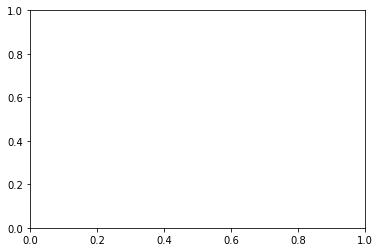

In [98]:
# group.head() #shows the dataset after removing columns

def pre_processing(dataframe):
    #include attributes of blue side
    features = dataframe.iloc[:, 1:20]
    dropping = ['station_id', 'classification_type', 'period', 'data_availability', 'data_reliability', 'data_quality_indicator', 'traffic_count']
    # dropping = ['year', 'traffic_count']
    features = features.drop(dropping, axis=1)
    target = dataframe.iloc[:, 5]
    
    return features, target

def evaluate(model, x_train, y_train, x_test, y_test ):
    if(model == None):
        print("Model does not exist")
        return

    print(f"Train accuracy {model.score(x_train,y_train)} ")
    print(f"Test accuracy {model.score(x_test,y_test)} ")

    # plt.scatter(X, Y)
    # plt.plot(X, Y_pred, color='red')
    # plt.show()
    return 

def process(df):
    x, y = pre_processing(df)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=10)
    
    model = LinearRegression()
    model.fit(x_train,y_train)

    evaluate(model, x_train, y_train, x_test, y_test)

# groups = df2.drop(grouped.get_group('INVALID').index)
grouped.apply(process)

# process(df2)


###linear regression - df2

In [ ]:
X = df2.iloc[:,0].values.reshape(-1,1)
Y = df2.iloc[:,1].value.re


##Dataset 3 - road_traffic_counts_hourly_sample

---



In [ ]:
hourly_samples_path = 'https://drive.google.com/uc?id=1URz3Zp1sS9n8cK0H47RJiNdV55LxXiYY'
df3 = pd.read_csv(hourly_samples_path)
df3.head() #display the head of the hourly sample dataset

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,13,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,the_geom,cartodb_id,the_geom_webmercator,record_id,station_key,traffic_direction_seq,cardinal_direction_seq,classification_seq,date,year,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,md5,updated_on
0,NaN,226714,NaN,NaN,58308,0,3,0,2010-05-24 00:00:00+00,2010,...,23.0,20.0,17.0,3.0,5.0,5.0,1.0,0.0,a0c8608b8d15dfd8b28c96bdff96ea6f,2018-06-12 05:16:50.885412+00
1,NaN,226715,NaN,NaN,58260,1,7,0,2006-05-10 00:00:00+00,2006,...,17.0,16.0,8.0,3.0,5.0,6.0,4.0,2.0,264a654a854aaf481c21b748d5ac18d3,2018-06-12 05:16:50.885412+00
2,NaN,226716,NaN,NaN,58333,0,3,0,2006-05-11 00:00:00+00,2006,...,17.0,18.0,8.0,3.0,3.0,3.0,0.0,1.0,9bdadee8611e83b6caba5ac6507ba0a0,2018-06-12 05:16:50.885412+00
3,NaN,226717,NaN,NaN,58308,1,7,0,2010-05-31 00:00:00+00,2010,...,7.0,11.0,8.0,3.0,2.0,1.0,0.0,2.0,70b9c041abfc5e27a8016c6ff1ce75a3,2018-06-12 05:16:50.885412+00
4,NaN,226718,NaN,NaN,58308,0,3,0,2006-05-14 00:00:00+00,2006,...,11.0,10.0,12.0,8.0,2.0,2.0,0.0,0.0,99fd24bfc22ded71840ab214723c8b4d,2018-06-12 05:16:50.885412+00


In [ ]:
df3.drop(columns = ["the_geom","cartodb_id","the_geom_webmercator","record_id","classification_seq","md5","updated_on"], inplace=True, axis =1)
#remove the excess data not required to train model

df3.head()

,station_key,traffic_direction_seq,cardinal_direction_seq,date,year,month,day_of_week,public_holiday,school_holiday,daily_total,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,58308,0,3,2010-05-24 00:00:00+00,2010,5,1,false,false,186,...,10.0,17.0,23.0,20.0,17.0,3.0,5.0,5.0,1.0,0.0
1,58260,1,7,2006-05-10 00:00:00+00,2006,5,3,false,false,198,...,13.0,7.0,17.0,16.0,8.0,3.0,5.0,6.0,4.0,2.0
2,58333,0,3,2006-05-11 00:00:00+00,2006,5,4,false,false,227,...,16.0,24.0,17.0,18.0,8.0,3.0,3.0,3.0,0.0,1.0
3,58308,1,7,2010-05-31 00:00:00+00,2010,5,1,false,false,177,...,15.0,19.0,7.0,11.0,8.0,3.0,2.0,1.0,0.0,2.0
4,58308,0,3,2006-05-14 00:00:00+00,2006,5,7,false,false,117,...,9.0,11.0,11.0,10.0,12.0,8.0,2.0,2.0,0.0,0.0


In [ ]:
result1 = pd.merge(df2, df3, how="left", on=["station_key"])
result1

NameError: ignored

##Joining the Datasets Together